## Intel·ligència Artificial - Exercici 1

# Iteració de valors (PDM) - Joc de Cartes (Manera 1) {Ganar, Perder}

In [8]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

__author__ = "Pau Sanchez Valdivieso"
__email__ = "pau@startval.com"
__date__ = "4-1-2017"

In [9]:
# Inicialitzacions

prob = 1
states = range(6)

discount = 1
RWNE = 0

card_types = ((1, prob * 0.25), (2, prob * 0.5), (3, prob * 0.25))

In [10]:
def get_game():
    """ Crea un joc nou """
    return {S: {'VoS': 0, 'QST': 0, 'QSP': 0, 'ViS': 0, 'Argmax': None} for S in states}

In [11]:
def get_res(state, action):
    """ Calcula un valor segons l'acció """
    
    if action == 'T':
        
        val = 0
        for card, _prob in card_types:
            try:
                val += _prob * (RWNE + (discount * game[state + card]['VoS']))
            except KeyError:
                val += 0
                
        return val
    
    _RW = state if state in range(5) else state * 2
    
    return prob * (_RW + discount * RWNE)

In [12]:
def bellman():
    """ Iteració de valors """
    
    for state in states:
        
        game[state]['QST'] = float(get_res(state, 'T'))
        game[state]['QSP'] = float(get_res(state, 'P'))
        game[state]['ViS'] = max(game[state]['QST'], game[state]['QSP'])
        
        if game[state]['QST'] > game[state]['QSP']:
            game[state]['Argmax'] = 'T'
        elif game[state]['QST'] < game[state]['QSP']:
            game[state]['Argmax'] = 'P'
        else:
            game[state]['Argmax'] = 'T, P'

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_iterations(num_iterations):
    """ Calcula i mostra les iteracions de Bellman"""
    
    for i in range(num_iterations):
        
        # Càlculs
        bellman()
        
        # Adapta figura
        fig, ax = plt.subplots(figsize=(9.8, 3.6))
        fig.suptitle(u"Iteració {0}".format(i + 1), fontsize=20)

        ax.xaxis.set_visible(False) 
        ax.yaxis.set_visible(False)
        ax.axis('off')

        clust_data = [0] * 6, [0] * 6, [0] * 6, [0] * 6,  [0] * 6 ,  [0] * 6
        collabel=("S", "Vo(S)", "Q(S, T)", "Q(S, P)", "Vi(S)", 'Argmax(a)')
        
        # Omple taula
        for state, attrs in game.iteritems():
            clust_data[state][0] = state
            clust_data[state][1] = attrs['VoS']
            clust_data[state][2] = attrs['QST']
            clust_data[state][3] = attrs['QSP']
            clust_data[state][4] = attrs['ViS']
            clust_data[state][5] = attrs['Argmax']

        # Plots
        table = ax.table(cellText=clust_data, colWidths=[0.2] * 6, colLabels=collabel, loc='center')
        table.set_fontsize(13)
        table.scale(1, 2)
        plt.show()
        
        # Prepara següent iteració
        for attrs in game.values():
            attrs['VoS'] = attrs['ViS']

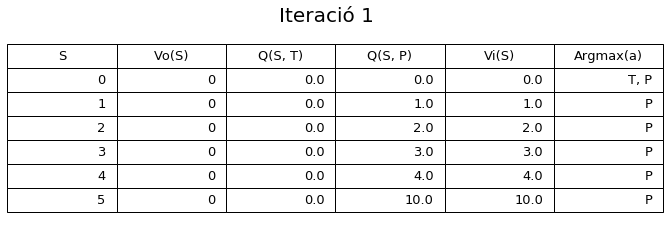

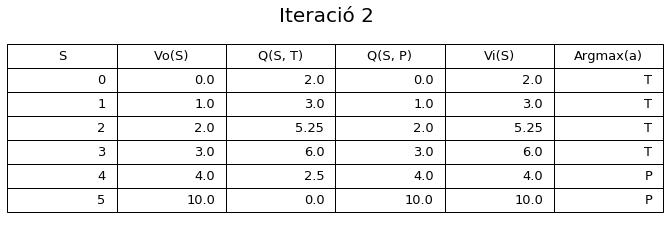

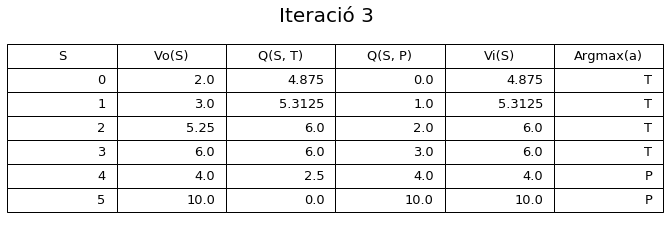

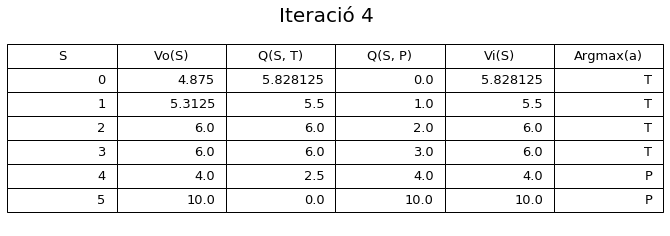

In [14]:
game = get_game()
num_iterations = 4
show_iterations(num_iterations)